In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import yaml

from utils import *

**Problem A: Use Markov chain Monte Carlo and the Metropolis-Hastings algorithm to simulate the 2D Ising
model at different temperatures T and magnetic field strengths B. Discuss your strategy for determining
the initial configuration, burn-in steps, total number of steps, and thinning (if any)**

In [2]:
#getting the parameters from the yaml file
with open("config.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
print(config)
STEPS = config['STEPS']
N = config['N']
J = config['J']
KB = config['KB']
T = config['T']
BURNIN = config['BURNIN']
B= config['B']

{'STEPS': 200000, 'N': 100, 'J': 1, 'KB': 1, 'T': 2, 'BURNIN': 50000, 'B': 1, 'T_C': 2.269}


  0%|          | 0/200000 [00:00<?, ?it/s]

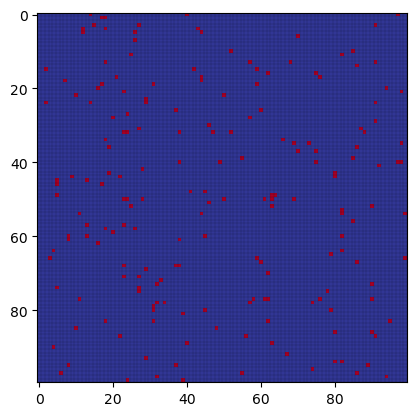

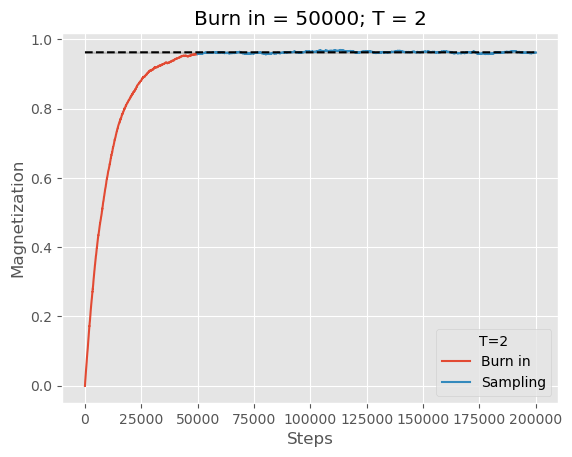

magnetization mean = 0.9627086866666668
magnetization std = 0.0023911889947239333


In [3]:
#2d ising model:
# N = 100
m_valuesUP, lattice_spins, steps = spins(steps=STEPS, random=True, mag=B)
plot_lattice(lattice_spins)
plot_m(m_valuesUP, burn_in = BURNIN)

In [9]:
temps = np.linspace(1,4,10)
print(temps)
magnetic_field = np.linspace(0,1,2)
print(magnetic_field)

[1.         1.33333333 1.66666667 2.         2.33333333 2.66666667
 3.         3.33333333 3.66666667 4.        ]
[0. 1.]


In [10]:
# stats(temp=T, steps=STEPS, burn_in=BURNIN, size=N, mag=B, display=True):
results = np.array([stats(temp, steps = 200_000, burn_in = 50_000, size = 100, mag = B) for temp in temps])

# results = np.array([stats(temp, steps = 1_000_000, size = N, burn_in = 100_000, mag = B) for temp in temps])


  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

[]

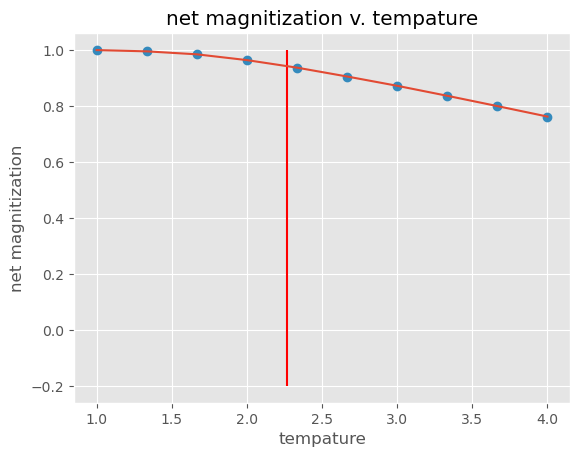

In [11]:
plt.errorbar(temps, results.T[0], yerr=results.T[1])
plt.plot(temps, results.T[0], 'o')
plt.vlines([2.269], ymin=-0.2, ymax=1.0, color='red')
plt.title('net magnitization v. tempature')
plt.xlabel('tempature')
plt.ylabel('net magnitization')
plt.plot()

In [ ]:
print(STEPS)
# results = np.array([[stats(int(temp), STEPS, BURNIN,N, int(B), display=False) for B in magnetic_field] for temp in tqdm(temps)])
results = np.array([[stats(int(temp), STEPS, BURNIN,N, int(B), display=False) for temp in temps] for B in tqdm(magnetic_field, disable = True)])




1000000


results.shape (2, 5, 2)


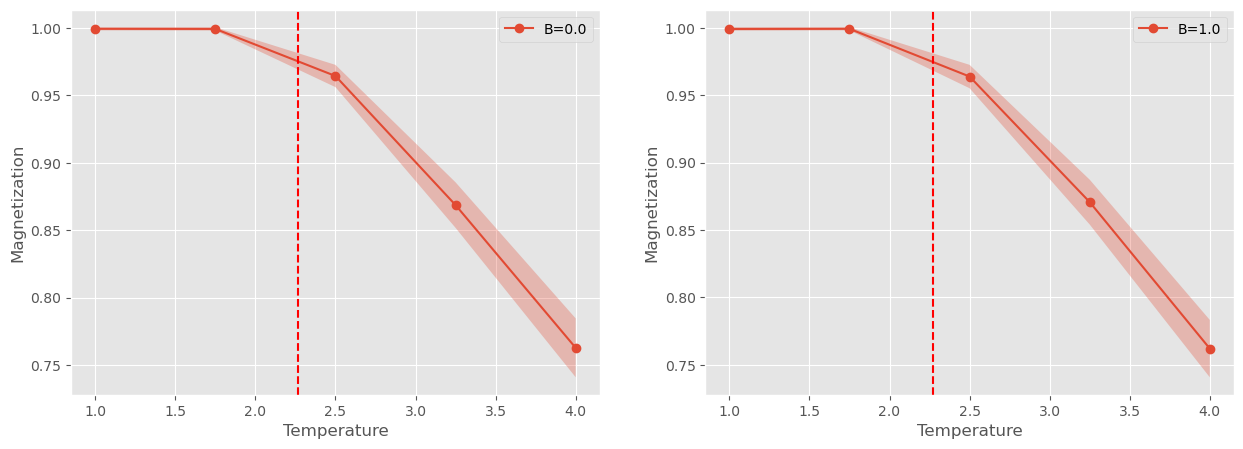

In [ ]:
print("results.shape", results.shape)
plt.style.use('ggplot')
axes_shape = (1, len(magnetic_field))
fig, ax = plt.subplots(axes_shape[0], axes_shape[1], figsize=(15, 5))
for i in range(len(magnetic_field)):
    curr_plot = results[i,:,0]
    std = results[i,:,1]
    ax[i].plot(temps, curr_plot, label=f"B={magnetic_field[i]}", marker='o')
    ax[i].fill_between(temps, curr_plot-std, curr_plot+std, alpha=0.3)
    ax[i].set_xlabel("Temperature")
    ax[i].set_ylabel("Magnetization")
    ax[i].legend()
    ax[i].axvline(x= 2.269, color='red', linestyle='--')
plt.show()

results.shape (2, 5, 2)


ValueError: x and y must have same first dimension, but have shapes (5,) and (2,)

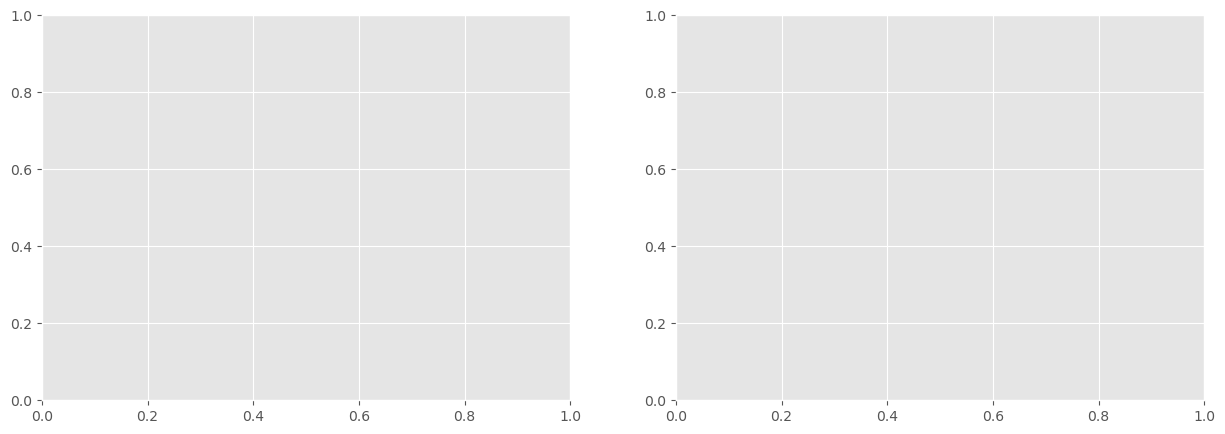

In [ ]:
print("results.shape", results.shape)
axes_shape = (1, len(magnetic_field))
fig, ax = plt.subplots(axes_shape[0], axes_shape[1], figsize=(15, 5))
for i in range(len(magnetic_field)):
    curr_plot = results[:,i,0]
    std = results[:,i,1]
    ax[i].plot(temps, curr_plot, label=f"B={magnetic_field[i]}")
    ax[i].fill_between(temps, curr_plot-std, curr_plot+std, alpha=0.3)
    ax[i].set_xlabel("Temperature")
plt.show()


ValueError: 'x' and 'y' must have the same size

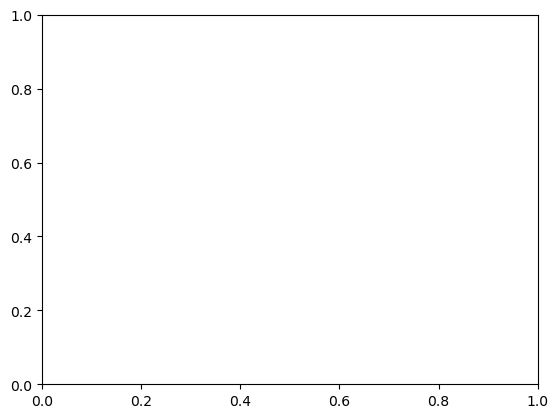

In [ ]:
plt.errorbar(temps, results.T[0], yerr=results.T[1])
plt.vlines([2.269], ymin=-0.2, ymax=1.0, color='red')
plt.title('net magnitization v. tempature')
plt.xlabel('tempature')
plt.ylabel('net magnitization') 
plt.plot()